<a href="https://colab.research.google.com/github/jhkr1/PythonML/blob/main/04_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#04.Logistic Regression


### 공부 시간에 따른 자격증 시험 합격 가능성

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/drive/MyDrive/PythonMLWokrspace/ScikitLearn/LogisticRegressionData.csv')

In [2]:
dataset.head()

,hour,pass
0,0.5,0
1,1.2,0
2,1.8,0
3,2.4,0
4,2.6,0


In [3]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [4]:
X

array([[ 0.5],
       [ 1.2],
       [ 1.8],
       [ 2.4],
       [ 2.6],
       [ 3.2],
       [ 3.9],
       [ 4.4],
       [ 4.5],
       [ 5. ],
       [ 5.3],
       [ 5.8],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.9],
       [ 7.2],
       [ 8.4],
       [ 8.6],
       [10. ]])

### 데이터 분리

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 학습 (로지스틱 회귀 모델)

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### 6시간 공부했을 때 예측

In [7]:
classifier.predict([[6]]) # array([1]) -> 합격

array([1])

In [8]:
classifier.predict_proba([[6]]) # array([[0.14150735, 0.85849265]])
# 불합격확률 14%, 합격확률 85%

array([[0.14150735, 0.85849265]])

In [9]:
classifier.predict([[4]]) # array([0]) -> 불합격

array([0])

In [10]:
classifier.predict_proba([[4]]) # array([[0.6249966, 0.3750034]])
# 불합격확률 62%, 합격확률 38%

array([[0.6249966, 0.3750034]])

### 분류 결과 예측(테스트 세트)

In [11]:
y_pred = classifier.predict(X_test)
y_pred # array([1, 0, 1, 1]) -> 예측값

array([1, 0, 1, 1])

In [12]:
y_test # 실제값

array([1, 0, 1, 0])

In [13]:
X_test # 공부 시간

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [14]:
classifier.score(X_test, y_test) # 모델 평가
# 전체 테스트 세트 4개 중에서 분류 예측를 올바로 맞힌 개수 3개 -> 0.75

0.75

### 데이터 시각화 (훈련 세트)

In [15]:
X_range = np.arange(min(X), max(X), 0.1) # X의 최솟값에서 X의 최댓값까지 0.1로 나눠서 데이터 생성
X_range

<ipython-input-15-bd84cb4bf903>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1) # X의 최솟값에서 X의 최댓값까지 0.1로 나눠서 데이터 생성


array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [29]:
p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))

In [30]:
p.shape

(1, 95)

In [18]:
X_range.shape

(95,)

In [31]:
p = p.reshape(-1) # 1차원 배열 형태로 변경
p.shape

(95,)

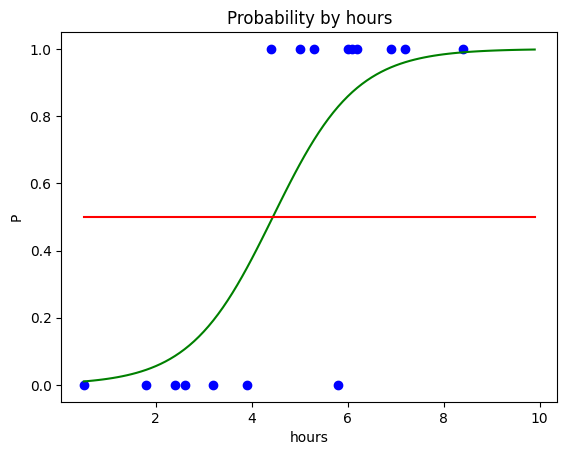

In [32]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color = 'red')
plt.title("Probability by hours")
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

### 데이터 시각화(테스트 세트)

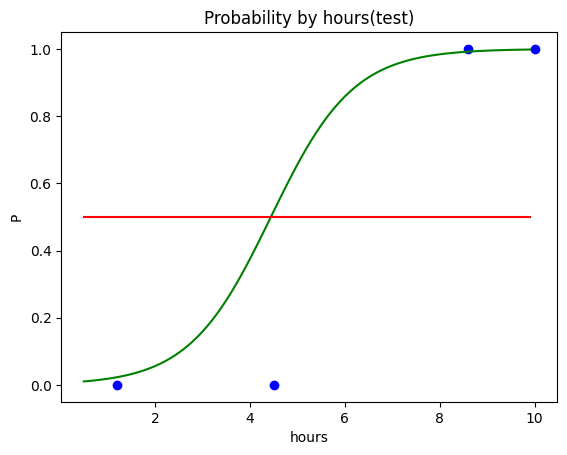

In [34]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color = 'red')
plt.title("Probability by hours(test)")
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

In [35]:
classifier.predict_proba([[4.5]]) # array([[0.48310686, 0.51689314]])
# 모델에서는 합격을 예측 그러나 실제로는 불합격

array([[0.48310686, 0.51689314]])

### 혼동 행렬(Confusion Matrix)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# array([[1, 1],
#       [0, 2]])

# TN FP
# FN TP

# •	TN (True Negative): 불합격이라고 예측했는데 실제로 불합격이었어. (올바르게 예측)
# •	TP (True Positive): 합격이라고 예측했는데 실제로 합격이었어. (올바르게 예측)
# •	FP (False Positive): 합격이라고 예측했는데 실제로는 불합격이었어. (잘못된 예측)
# •	FN (False Negative): 불합격이라고 예측했는데 실제로는 합격이었어. (잘못된 예측)


array([[1, 1],
       [0, 2]])